**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/interactive-maps).**

---


# Introduction

You are an urban safety planner in Japan, and you are analyzing which areas of Japan need extra earthquake reinforcement.  Which areas are both high in population density and prone to earthquakes?

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Kuh9gPj.png" width="450"><br/>
</center>

Before you get started, run the code cell below to set everything up.

In [1]:
import pandas as pd
import geopandas as gpd

import folium
from folium import Choropleth
from folium.plugins import HeatMap

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex3 import *

We define a function `embed_map()` for displaying interactive maps. It accepts two arguments: the variable containing the map, and the name of the HTML file where the map will be saved.

This function ensures that the maps are visible [in all web browsers](https://github.com/python-visualization/folium/issues/812).

In [2]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# Exercises

### 1) Do earthquakes coincide with plate boundaries?

Run the code cell below to create a DataFrame `plate_boundaries` that shows global plate boundaries.  The "coordinates" column is a list of (latitude, longitude) locations along the boundaries.

In [3]:
plate_boundaries = gpd.read_file("../input/geospatial-learn-course-data/Plate_Boundaries/Plate_Boundaries/Plate_Boundaries.shp")
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries.drop('geometry', axis=1, inplace=True)

plate_boundaries.head()

,HAZ_PLATES,HAZ_PLAT_1,HAZ_PLAT_2,Shape_Leng,coordinates
0,TRENCH,SERAM TROUGH (ACTIVE),6722,5.843467,"[(-5.444200361999947, 133.6808931800001), (-5...."
1,TRENCH,WETAR THRUST,6722,1.829013,"[(-7.760600482999962, 125.47879802900002), (-7..."
2,TRENCH,TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...,6621,6.743604,"[(19.817899819000047, 120.09999798800004), (19..."
3,TRENCH,BONIN TRENCH,9821,8.329381,"[(26.175899215000072, 143.20620700100005), (26..."
4,TRENCH,NEW GUINEA TRENCH,8001,11.998145,"[(0.41880004000006466, 132.8273013480001), (0...."


Next, run the code cell below without changes to load the historical earthquake data into a DataFrame `earthquakes`.

In [4]:
# Load the data and print the first 5 rows
earthquakes = pd.read_csv("../input/geospatial-learn-course-data/earthquakes1970-2014.csv", parse_dates=["DateTime"])
earthquakes.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970-01-04 17:00:40.200,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970-01-06 05:35:51.800,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970-01-08 17:12:39.100,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970-01-10 12:07:08.600,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970-01-16 08:05:39.000,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


The code cell below visualizes the plate boundaries on a map.  Use all of the earthquake data to add a heatmap to the same map, to determine whether earthquakes coincide with plate boundaries.  

In [5]:
# Create a base map with plate boundaries
m_1 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_1)

# Your code here: Add a heatmap to the map
HeatMap(data = earthquakes[['Latitude','Longitude']],radius = 10).add_to(m_1)

# Uncomment to see a hint
#q_1.a.hint()

# Show the map
embed_map(m_1, 'q_1.html')

In [6]:
# Get credit for your work after you have created a map
q_1.a.check()

# Uncomment to see our solution (your code may look different!)
#q_1.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

So, given the map above, do earthquakes coincide with plate boundaries?

In [7]:
# View the solution (Run this code cell to receive credit!)
q_1.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Yes, earthquakes coincide with plate boundaries.

### 2) Is there a relationship between earthquake depth and proximity to a plate boundary in Japan?

You recently read that the depth of earthquakes tells us [important information](https://www.usgs.gov/faqs/what-depth-do-earthquakes-occur-what-significance-depth?qt-news_science_products=0#qt-news_science_products) about the structure of the earth.  You're interested to see if there are any intereresting global patterns, and you'd also like to understand how depth varies in Japan.



(array([4205.,  426.,  216.,  103.,   22.,   53.,   40.,   65.,  132.,
          42.]),
 array([  0. ,  68.8, 137.6, 206.4, 275.2, 344. , 412.8, 481.6, 550.4,
        619.2, 688. ]),
 <BarContainer object of 10 artists>)

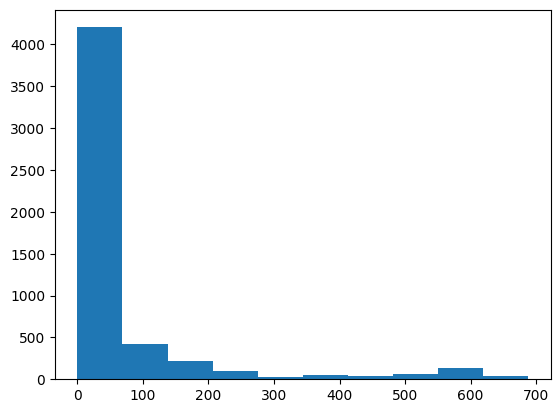

In [8]:
import matplotlib.pyplot as plt
plt.hist(earthquakes['Depth'])

In [9]:
# Create a base map with plate boundaries
m_2 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_2)

def color_producer(val):
    if(val < 50):
        return 'green'
    elif(val < 100):
        return 'yellow'
    else:
        return 'red'

# Your code here: Add a map to visualize earthquake depth
for i in range(0,len(earthquakes)):
    folium.Circle(
        location=[earthquakes.iloc[i]['Latitude'],earthquakes.iloc[i]['Longitude']],
        radius=20, color = color_producer(earthquakes.iloc[i]['Depth'])).add_to(m_2)

# Uncomment to see a hint
#q_2.a.hint()

# View the map
embed_map(m_2, 'q_2.html')

In [10]:
# Get credit for your work after you have created a map
q_2.a.check()

# Uncomment to see our solution (your code may look different!)
#q_2.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

Can you detect a relationship between proximity to a plate boundary and earthquake depth?  Does this pattern hold globally?  In Japan?

In [11]:
# View the solution (Run this code cell to receive credit!)
q_2.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> In the northern half of Japan, it does appear that earthquakes closer to plate boundaries tend to be shallower (and earthquakes farther from plate boundaries are deeper).  This pattern is repeated in other locations, such as the western coast of South America.  But, it does not hold everywhere (for instance, in China, Mongolia, and Russia).

### 3) Which prefectures have high population density?

Run the next code cell (without changes) to create a GeoDataFrame `prefectures` that contains the geographical boundaries of Japanese prefectures.

In [12]:
# GeoDataFrame with prefecture boundaries
prefectures = gpd.read_file("../input/geospatial-learn-course-data/japan-prefecture-boundaries/japan-prefecture-boundaries/japan-prefecture-boundaries.shp")
prefectures.set_index('prefecture', inplace=True)
prefectures.head()

,geometry
prefecture,
Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ..."
Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ..."
Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ..."
Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


The next code cell creates a DataFrame `stats` containing the population, area (in square kilometers), and population density (per square kilometer) for each Japanese prefecture.  Run the code cell without changes.

In [13]:
# DataFrame containing population of each prefecture
population = pd.read_csv("../input/geospatial-learn-course-data/japan-prefecture-population.csv")
population.set_index('prefecture', inplace=True)

# Calculate area (in square kilometers) of each prefecture
area_sqkm = pd.Series(prefectures.geometry.to_crs(epsg=32654).area / 10**6, name='area_sqkm')
stats = population.join(area_sqkm)

# Add density (per square kilometer) of each prefecture
stats['density'] = stats["population"] / stats["area_sqkm"]
stats.head()

,population,area_sqkm,density
prefecture,,,
Tokyo,12868000,1800.614782,7146.448049
Kanagawa,8943000,2383.038975,3752.771186
Osaka,8801000,1923.151529,4576.342460
Aichi,7418000,5164.400005,1436.372085
Saitama,7130000,3794.036890,1879.264806


Use the next code cell to create a choropleth map to visualize population density.

In [14]:
# Create a base map
m_3 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: create a choropleth map to visualize population density
Choropleth(geo_data=prefectures['geometry'].__geo_interface__, 
           data=stats.density, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
          ).add_to(m_3)

# Uncomment to see a hint
#q_3.a.hint()

# View the map
embed_map(m_3, 'q_3.html')

In [15]:
# Get credit for your work after you have created a map
q_3.a.check()

# Uncomment to see our solution (your code may look different!)
#q_3.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

Which three prefectures have relatively higher density than the others?  Are they spread throughout the country, or all located in roughly the same geographical region?  (*If you're unfamiliar with Japanese geography, you might find [this map](https://en.wikipedia.org/wiki/Prefectures_of_Japan) useful to answer the questions.)*

In [16]:
# View the solution (Run this code cell to receive credit!)
q_3.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Tokyo, Kanagawa, and Osaka have the highest population density.  All of these prefectures are located in central Japan, and Tokyo and Kanagawa are adjacent.

### 4) Which high-density prefecture is prone to high-magnitude earthquakes?

Create a map to suggest one prefecture that might benefit from earthquake reinforcement.  Your map should visualize both density and earthquake magnitude.

In [17]:
# Create a base map
m_4 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)

# Your code here: create a map
Choropleth(geo_data=prefectures['geometry'].__geo_interface__, 
           data=stats.density, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
          ).add_to(m_4)

def color_producer(magnitude):
    if magnitude > 6.0:
        return 'red'
    else:
        return 'green'

for i in range(0,len(earthquakes)):
    folium.Circle(
        location=[earthquakes.iloc[i]['Latitude'],earthquakes.iloc[i]['Longitude']],
        radius=20, color = color_producer(earthquakes.iloc[i]['Magnitude'])).add_to(m_4)

# Uncomment to see a hint
#q_4.a.hint()

# View the map
embed_map(m_4, 'q_4.html')

In [18]:
# Get credit for your work after you have created a map
q_4.a.check()

# Uncomment to see our solution (your code may look different!)
#q_4.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

Which prefecture do you recommend for extra earthquake reinforcement?

In [19]:
# View the solution (Run this code cell to receive credit!)
q_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> While there's no clear, single answer to this question, there are a few reasonable options. **Tokyo** is by far the most densely populated prefecture and has also experienced a number of earthquakes.  **Osaka** is relatively less densely populated, but experienced an earthquake that was relatively stronger than those near Tokyo.  And, the long coast of **Kanagawa** (in addition to its high density and the historical proximity of strong earthquakes) might lead us to worry about the added potential tsunami risk.

# Keep going

Learn how to convert names of places to geographic coordinates with **[geocoding](https://www.kaggle.com/alexisbcook/manipulating-geospatial-data)**.  You'll also explore special ways to join information from multiple GeoDataFrames.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*